<a href="https://colab.research.google.com/github/NasywaAzmi/Praktikum-Data-Mining/blob/main/Checkpoint_5_Data_Mining_(Akhmad_Nasywa_Azmi_2209116099).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Perbandingan Tingkat Kematian antara Negara Menggunakan Model Supervised Learning

#**Import Library**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler


from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

##Business Understanding

###Tujuan Bisnis
Analisis ini bertujuan untuk mengidentifikasi perbedaan dalam penyebab kematian utama antar negara. Dengan memahami perbedaan ini, kita dapat menyoroti tantangan kesehatan berbeda yang dihadapi oleh masing-masing negara

###Menilai Situasi
Dengan memahami perbedaan dalam pola kematian antar negara, perusahaan atau organisasi yang bersangkutan dapat lebih memahami populasi yang mereka layani. Ini bisa membantu dalam merancang sebuah produk atau layanan yang lebih sesuai dengan kebutuhan dan tantangan kesehatan yang spesifik dari masing-masing negara

###Tujuan Data Mining
Tujuan dari Data Mining pada dataset ini adalah untuk memberikan analisis data agar intervensi kesehatan dapat dirancang dengan lebih tepat sasaran untuk mengatasi masalah-masalah kesehatan yang spesifik dalam negara-negara tersebut

###Rencana Projek
Rencana proyek untuk menganalisis dataset ini dimulai dengan menentukan tujuan dan latar belakang proyek, selanjutnya akan dilakukan eksplorasi awal terhadap data untuk memahami struktur dataset, distribusi variabel kematian, dan pola umum yang mungkin terlihat. setelah itu menganalisis perbandingan tingkat kematian, penyebab kematian utama dan faktor yang mempengaruhi dari berbagai masing negara. setelah semua itu dilakukan, maka bisa menginterpretasi temuan dan menarik kesimpulan

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Jelaskan darimana sumber data kalian di sini, sertakan linknya juga ya


In [4]:
df = pd.read_csv('cause_of_deaths.csv')
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


##**Describe Data**

####Informasi Dasar

In [5]:
print('Jumlah baris = ', df.shape[0])
print('Jumlah kolom = ', df.shape[1])

Jumlah baris =  6120
Jumlah kolom =  34


####Informasi Lanjutan####

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

penjelasan nanti

####Informasi Statistik Deskriptif

In [7]:
df.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


Penjelasan lagi

##**Exploratory Data Analysis**

In [8]:
job_title = df[['Country/Territory', 'Malaria']]
job_title = job_title.groupby('Country/Territory').median()
job_title = job_title.rename_axis('Country/Territory').reset_index()
job_title = job_title.sort_values(by=['Malaria'], ascending=False).head(10)
job_title

,Country/Territory,Malaria
129,Nigeria,209847.0
48,Democratic Republic of Congo,89237.5
81,India,71197.0
190,Uganda,45521.5
28,Burkina Faso,32222.0
43,Cote d'Ivoire,29533.5
179,Tanzania,28191.5
120,Mozambique,28101.0
68,Ghana,23590.5
108,Mali,21395.0


**Penjelasan**

##**Verify Data Quality**

####Missing Values

In [9]:
df.isna().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

Dari informasi diatas dapat dilihat bahwa semua kolom tidak ada yang memiliki nilai kosong

####Outliers Values

<Axes: >

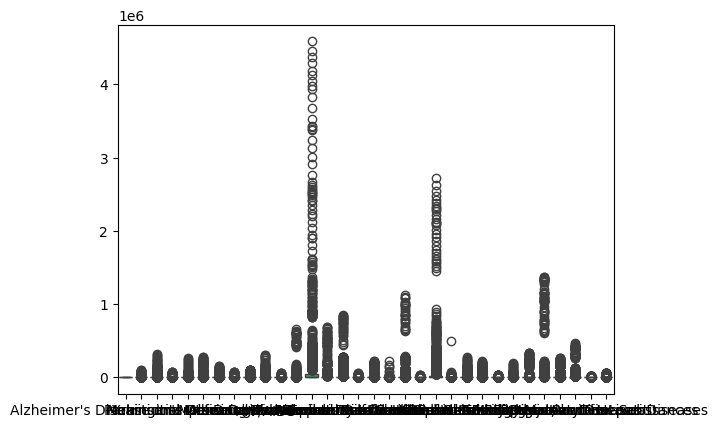

In [10]:
sns.boxplot(data=df)

Dapat dilihat diatas bahwa dataset ini memiliki jumlah outlier yang
banyak


####Duplicated Values

In [11]:
df.duplicated().sum()

0

Dari informasi diatas dapat dilihat bahwa tidak ada nilai yang duplikat

#**Inisiasi Variabel untuk menyimpan dataframe**

In [12]:
df = pd.read_csv('cause_of_deaths.csv')

In [13]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


#**Data Cleaning**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang  bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [14]:
print((df.isna().sum() / len(df)) * 100)

Country/Territory                             0.0
Code                                          0.0
Year                                          0.0
Meningitis                                    0.0
Alzheimer's Disease and Other Dementias       0.0
Parkinson's Disease                           0.0
Nutritional Deficiencies                      0.0
Malaria                                       0.0
Drowning                                      0.0
Interpersonal Violence                        0.0
Maternal Disorders                            0.0
HIV/AIDS                                      0.0
Drug Use Disorders                            0.0
Tuberculosis                                  0.0
Cardiovascular Diseases                       0.0
Lower Respiratory Infections                  0.0
Neonatal Disorders                            0.0
Alcohol Use Disorders                         0.0
Self-harm                                     0.0
Exposure to Forces of Nature                  0.0


#####**Pengecekkan Ulang**

In [15]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Country/Territory,0.0
Code,0.0
Year,0.0
Meningitis,0.0
Alzheimer's Disease and Other Dementias,0.0
Parkinson's Disease,0.0
Nutritional Deficiencies,0.0
Malaria,0.0
Drowning,0.0
Interpersonal Violence,0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [16]:
df[df.duplicated()]

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis


###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [17]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Year,0.000000
Meningitis,16.813725
Alzheimer's Disease and Other Dementias,13.382353
Parkinson's Disease,13.251634
Nutritional Deficiencies,15.522876
Malaria,20.882353
Drowning,11.977124
Interpersonal Violence,13.741830
Maternal Disorders,12.892157
HIV/AIDS,17.009804


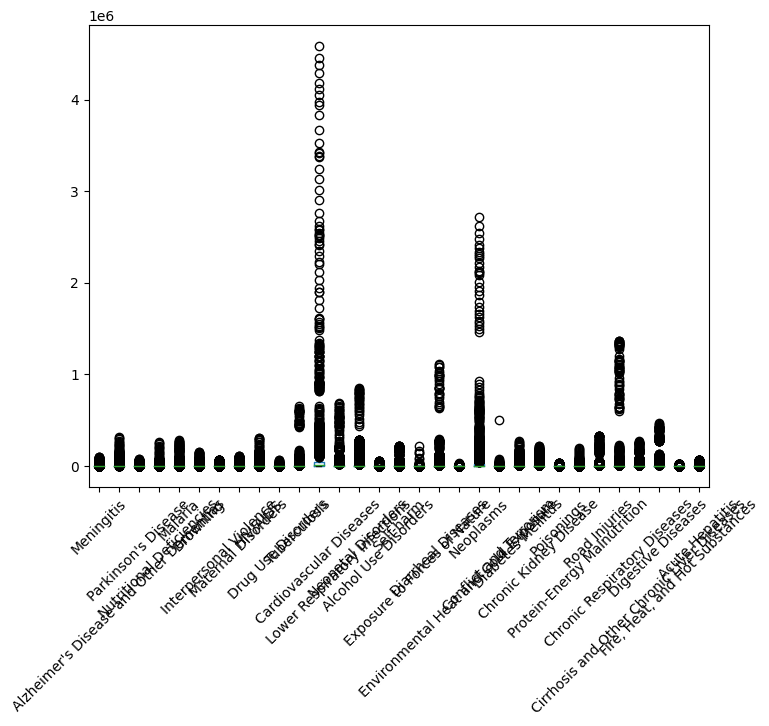

In [18]:
boxplot = df.drop('Year', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [19]:
def categorize_year(Year):
    if Year < 1999:
        return '1990s'
    elif 1999 <= Year < 2010:
        return '2000s'
    else:
        return '2010s'

df['yearCategory'] = df['Year'].apply(categorize_year)


Cek Data

In [20]:
df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,yearCategory
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,1990s
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,1990s
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,1990s
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,1990s
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,2010s
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,2010s
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,2010s
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,2010s


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [21]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

#**Data Transformation**

###**Mapping**

In [22]:
df['yearCategory'] = df['yearCategory'].map({'1990s': 0, '2000s': 1,'2010s': 2}).astype(int)

###**Pengecekkan Hasil**

In [23]:
df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,yearCategory
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,0
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,0
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,0
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,0
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,2
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,2
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,2
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,2


###**Encoding**

In [24]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [25]:
df.head()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Code_VCT,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,0,0,0,0,0,0,0,0,0,0
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,0,0,0,0,0,0,0,0,0,0
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,0,0,0,0,0,0,0,0,0,0
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,0,0,0,0,0,0,0,0,0,0
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.to_csv('Data Cleaning.csv', index=False)

#**Modelling**

Library untuk Splitting Data



In [27]:
df=pd.read_csv("Data Cleaning.csv")

In [28]:
df.head()


,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Code_VCT,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,0,0,0,0,0,0,0,0,0,0
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,0,0,0,0,0,0,0,0,0,0
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,0,0,0,0,0,0,0,0,0,0
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,0,0,0,0,0,0,0,0,0,0
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,0,0,0,0,0,0,0,0,0,0


#**Modelling Predict**

###**Pre-Processing**

Adjustment

In [29]:
x_final = df.drop(["Year", "Malaria"], axis=1)


Split Data

In [30]:
x = df.drop(["Year", "Malaria"], axis=1)

y1 = df["Year"]
y2 = df["Malaria"]

x_train, x_test, y1_train, y1_test, y2_train, y2_test = train_test_split(x, y1, y2, test_size=0.3, random_state=42)

Normalisasi Data

In [31]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)


###**Build And Train Model**

Gaussian Naive Bayes


In [32]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y1_train)

GaussianNB()

K-Nearest Neighbor

In [33]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y1_train)

KNeighborsClassifier()

Decision Tree


In [34]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y1_train)

DecisionTreeClassifier()

#**Evaluation**

##**Evaluate Results**

###**Klasifikasi**

Gaussian Naive Bayes

NameError: name 'y_test' is not defined

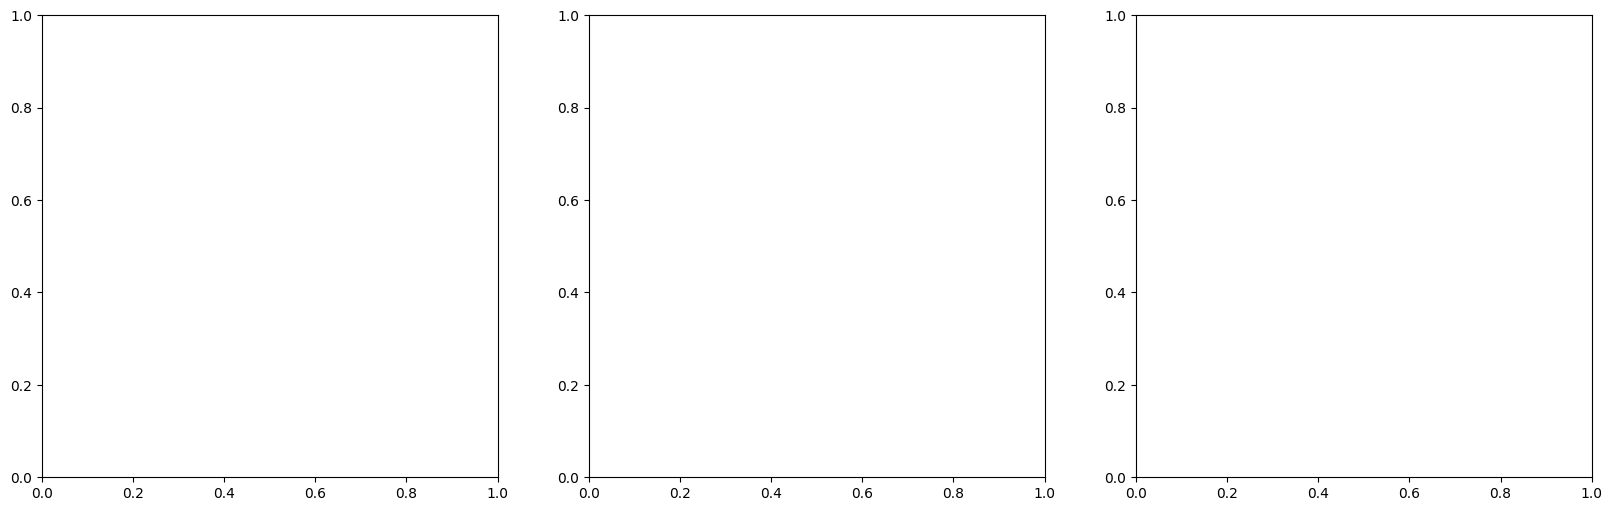

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = gnb_cm.ravel()

accuracy = (tp+tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, gnb_pred)
print("nilai akurasi gnb : ", accuracy)
print("nilai presisi gnb : ", precision)
print("nilai recall gnb : ", recall)
print("nilai f1-score gnb : ", f1_score)
print("nilai roc gnb : ", roc_score)

NameError: name 'gnb_cm' is not defined

NameError: name 'y_test' is not defined

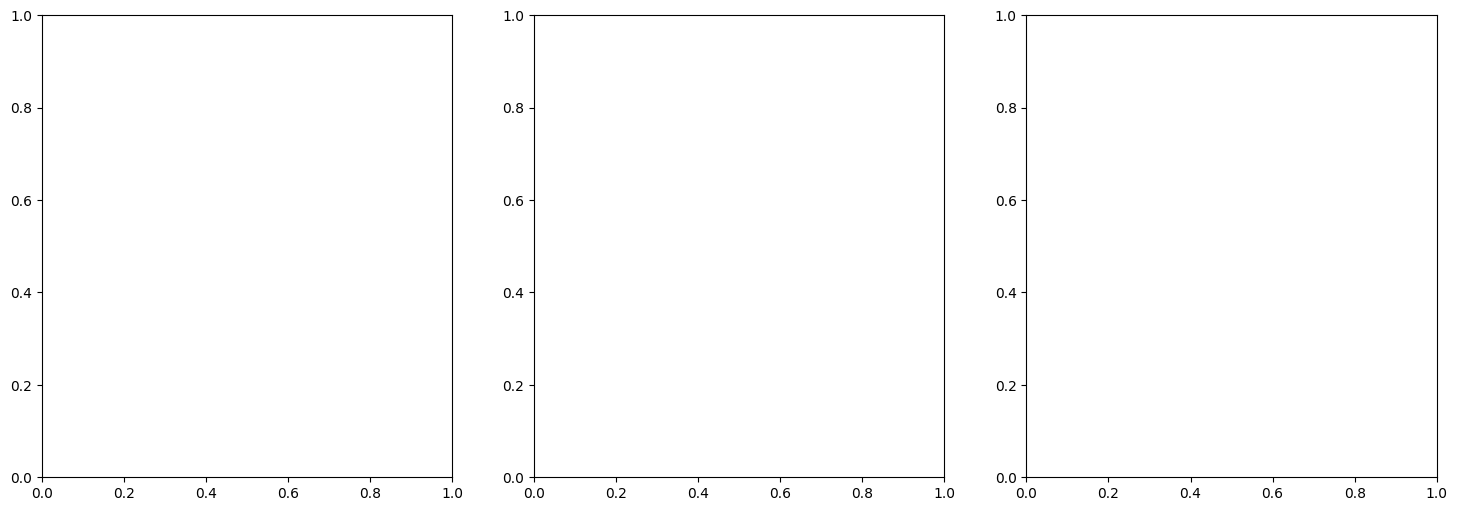

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test_norm)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

###**Klustering**

In [38]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

NameError: name 'x_final_norm' is not defined

###**Regresi**

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train_r, y_test_r = train_test_split(data, target, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train_r)

y_pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test_r, y_pred_lr)
mse_lr = mean_squared_error(y_test_r, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test_r, y_pred_lr)

model_dt = DecisionTreeRegressor()

model_dt.fit(X_train, y_train_r)

y_pred_dt = model_dt.predict(X_test)

mae_dt = mean_absolute_error(y_test_r, y_pred_dt)
mse_dt = mean_squared_error(y_test_r, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test_r, y_pred_dt)

eval_metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
eval_scores_lr = [mae_lr, mse_lr, rmse_lr, mape_lr]
eval_scores_dt = [mae_dt, mse_dt, rmse_dt, mape_dt]

df_eval = pd.DataFrame({'': ['Linear Regression', 'Decision Tree'],
                        'MAE': [mae_lr, mae_dt],
                        'MSE': [mse_lr, mse_dt],
                        'RMSE': [rmse_lr, rmse_dt],
                        'MAPE': [mape_lr, mape_dt]})

df_eval = df_eval.set_index('')

display(df_eval)

,MAE,MSE,RMSE,MAPE
,,,,
Linear Regression,3.189092,24.291119,4.928602,0.168664
Decision Tree,2.200000,9.025490,3.004245,0.118045


##**Review Process**

###**Cross Validation**

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

NameError: name 'y_train' is not defined

###**Feature Selection**

In [41]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

NameError: name 'y_train' is not defined

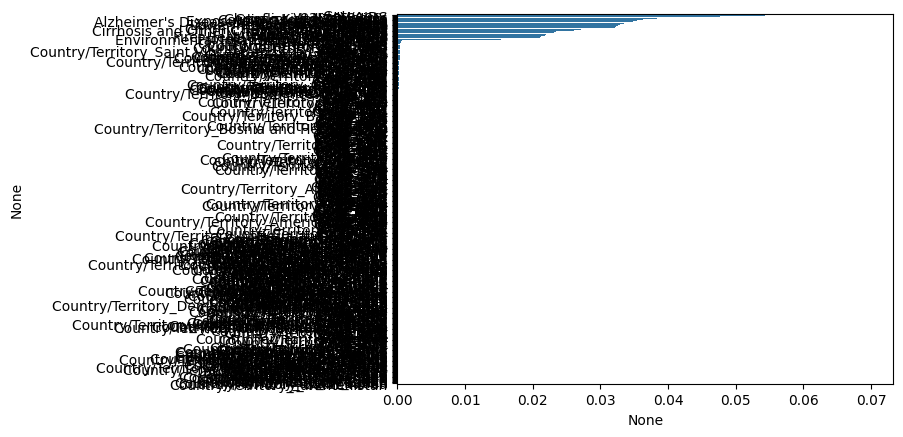

In [42]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

###**Tuning Hyperparameter**

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

NameError: name 'y_train' is not defined

In [44]:
gnb = GaussianNB(var_smoothing=0.43287612810830584)